### 얼굴 인식 실습

In [2]:
from deepface import DeepFace
from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace

import matplotlib.pyplot as plt
import numpy as np
import cv2

VGGFace2_DeepFace_weights_val-0.9034.h5 will be downloaded...


Downloading...
From: https://github.com/swghosh/DeepFace/releases/download/weights-vggface2-2d-aligned/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
To: C:\Users\main\.deepface\weights\VGGFace2_DeepFace_weights_val-0.9034.h5.zip
100%|██████████| 511M/511M [00:14<00:00, 35.8MB/s] 


1/1 [==============================] - 0s 61ms/step
Euclidean distance : 87.00641


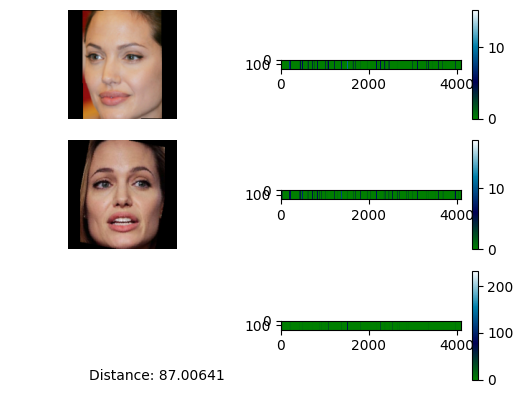

In [12]:
# model = VGGFace.loadModel()
# model = Facenet.loadModel()
# model = OpenFace.loadModel()
model = FbDeepFace.loadModel()

# input_size = model.layers[0].input_shape[1:3]
input_size = model.input_shape[1:3]

backends = ['opencv', 'ssd', 'dlib', 'mtcnn']

img1 = DeepFace.detectFace("./imgs/aj1.jpg", detector_backend = backends[3])
img2 = DeepFace.detectFace("./imgs/aj2.png", detector_backend = backends[3])

img1 = cv2.resize(img1, input_size)
img2 = cv2.resize(img2, input_size)

img1 = np.expand_dims(img1, axis=0)
img2 = np.expand_dims(img2, axis=0)
img1_representation = model.predict(img1)[0,:]
img2_representation = model.predict(img2)[0,:]

distance_vector = np.square(img1_representation - img2_representation)
distance = np.sqrt(distance_vector.sum())
print('Euclidean distance :', distance)

img1_graph = []
img2_graph = []
distance_graph = []
for i in range(0, 200):
    img1_graph.append(img1_representation)
    img2_graph.append(img2_representation)
    distance_graph.append(distance_vector)
    
img1_graph = np.array(img1_graph)
img2_graph = np.array(img2_graph)
distance_graph = np.array(distance_graph)

fig = plt.figure()

ax1 = fig.add_subplot(3,2,1)
plt.imshow(img1[0])
plt.axis('off')
ax2 = fig.add_subplot(3,2,2)
im = plt.imshow(img1_graph, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
ax3 = fig.add_subplot(3,2,3)
plt.imshow(img2[0])
plt.axis('off')
ax4 = fig.add_subplot(3,2,4)
im = plt.imshow(img2_graph, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
ax5 = fig.add_subplot(3,2,5)
plt.text(0.35, 0, "Distance: %s" % (distance))
plt.axis('off')

ax6 = fig.add_subplot(3,2,6)
im = plt.imshow(distance_graph, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()

plt.show()

# cv2.imshow('img1', img1)
# cv2.imshow('img2', img2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()